In [2]:
import cv2
from matplotlib import pyplot as plt

In [3]:
def show_image(image, cmap="gray"):
    plt.imshow(image, cmap)
    plt.show()

In [4]:
image = plt.imread('../data/cars.png')

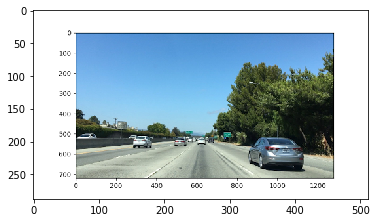

In [5]:
plt.imshow(image)
plt.show()

In [6]:
image = plt.imread('../data/cutout1.jpg')

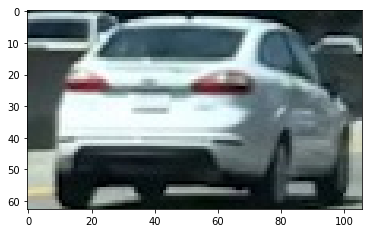

In [7]:
plt.imshow(image)
plt.show()

In [8]:
import numpy as np

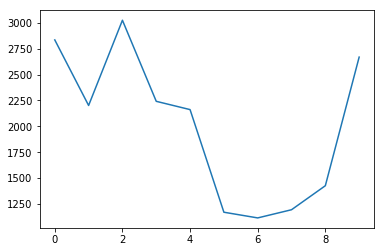

In [9]:
plt.plot(np.histogram(image)[0])
plt.show()

In [10]:
rhist = np.histogram(image[:,:,0], bins=32, range=(0,255))
ghist = np.histogram(image[:,:,1], bins=32, range=(0,255))
bhist = np.histogram(image[:,:,2], bins=32, range=(0,255))

In [11]:
bin_edges = rhist[1]

In [12]:
bin_edges

array([   0.     ,    7.96875,   15.9375 ,   23.90625,   31.875  ,
         39.84375,   47.8125 ,   55.78125,   63.75   ,   71.71875,
         79.6875 ,   87.65625,   95.625  ,  103.59375,  111.5625 ,
        119.53125,  127.5    ,  135.46875,  143.4375 ,  151.40625,
        159.375  ,  167.34375,  175.3125 ,  183.28125,  191.25   ,
        199.21875,  207.1875 ,  215.15625,  223.125  ,  231.09375,
        239.0625 ,  247.03125,  255.     ])

In [13]:
bin_edges[1:]

array([   7.96875,   15.9375 ,   23.90625,   31.875  ,   39.84375,
         47.8125 ,   55.78125,   63.75   ,   71.71875,   79.6875 ,
         87.65625,   95.625  ,  103.59375,  111.5625 ,  119.53125,
        127.5    ,  135.46875,  143.4375 ,  151.40625,  159.375  ,
        167.34375,  175.3125 ,  183.28125,  191.25   ,  199.21875,
        207.1875 ,  215.15625,  223.125  ,  231.09375,  239.0625 ,
        247.03125,  255.     ])

In [14]:
bin_edges[0:len(bin_edges)-1]

array([   0.     ,    7.96875,   15.9375 ,   23.90625,   31.875  ,
         39.84375,   47.8125 ,   55.78125,   63.75   ,   71.71875,
         79.6875 ,   87.65625,   95.625  ,  103.59375,  111.5625 ,
        119.53125,  127.5    ,  135.46875,  143.4375 ,  151.40625,
        159.375  ,  167.34375,  175.3125 ,  183.28125,  191.25   ,
        199.21875,  207.1875 ,  215.15625,  223.125  ,  231.09375,
        239.0625 ,  247.03125])

In [15]:
(bin_edges[1:] + bin_edges[0:len(bin_edges)-1])/2

array([   3.984375,   11.953125,   19.921875,   27.890625,   35.859375,
         43.828125,   51.796875,   59.765625,   67.734375,   75.703125,
         83.671875,   91.640625,   99.609375,  107.578125,  115.546875,
        123.515625,  131.484375,  139.453125,  147.421875,  155.390625,
        163.359375,  171.328125,  179.296875,  187.265625,  195.234375,
        203.203125,  211.171875,  219.140625,  227.109375,  235.078125,
        243.046875,  251.015625])

In [16]:
bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2

In [17]:
fig = plt.figure(figsize=(12,3))
plt.subplot(131)
plt.bar(bin_centers, rhist[0])
plt.xlim(0, 256)
plt.title('R Histogram')
plt.subplot(132)
plt.bar(bin_centers, ghist[0])
plt.xlim(0, 256)
plt.title('G Histogram')
plt.subplot(133)
plt.bar(bin_centers, bhist[0])
plt.xlim(0, 256)
plt.title('B Histogram')

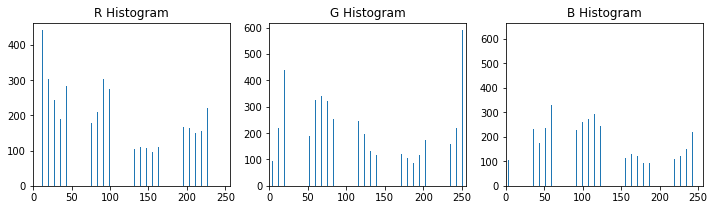

In [18]:
plt.show()

In [19]:
# Create histogram features
# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(image[:,:,0], bins=32, range=(0,255))
    ghist = np.histogram(image[:,:,1], bins=32, range=(0,255))
    bhist = np.histogram(image[:,:,2], bins=32, range=(0,255))
    # Generating bin centers
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features
    
rh, gh, bh, bincen, feature_vec = color_hist(image, nbins=32, bins_range=(0, 256))

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=((0, 255), (0, 255), (0, 255))):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation

In [21]:
def plot_3d_image(img):
    # Select a small fraction of pixels to plot by subsampling it
    scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
    img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

    # Convert subsampled image to desired color space(s)
    img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
    img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
    img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting
    
    plt.imshow(img_small_RGB)
    plt.show()
    
    # Plot and show
    plot3d(img_small_RGB, img_small_rgb)
    plt.show()

    plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
    plt.show()

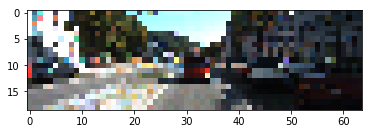

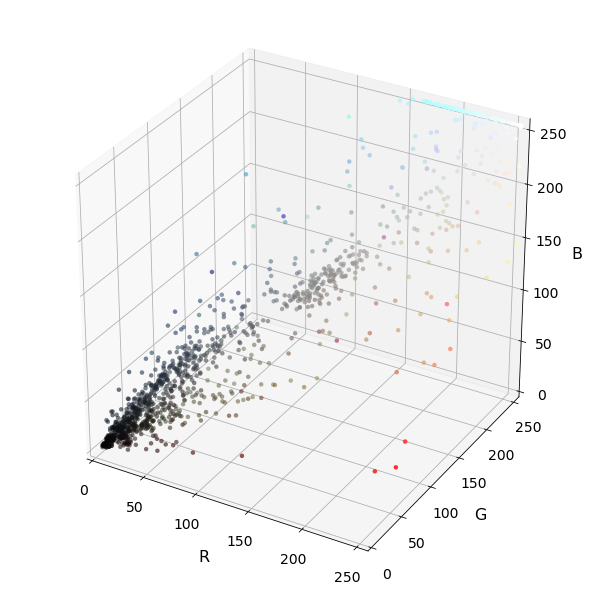

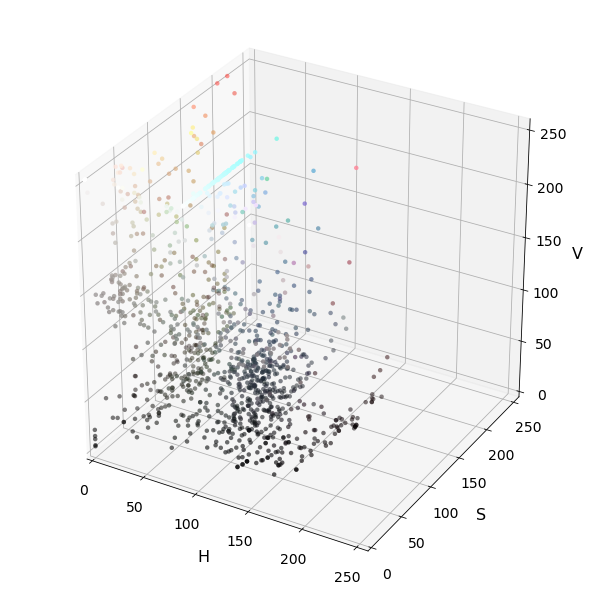

In [22]:
# Read a color image
img = cv2.imread("../data/000275.png")
plot_3d_image(img)

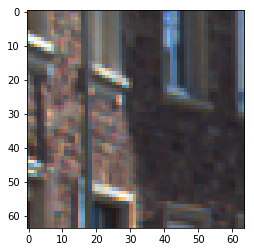

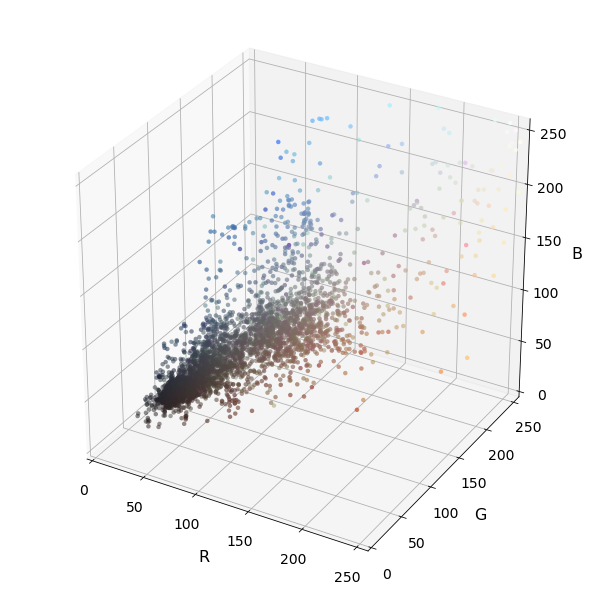

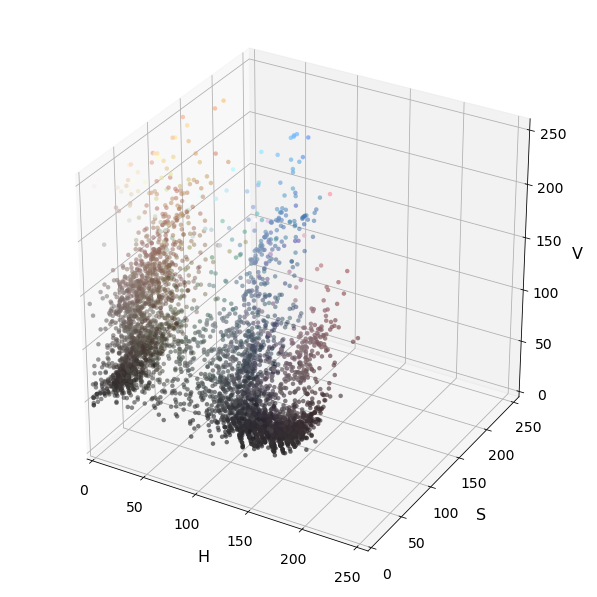

In [23]:
img = cv2.imread("../data/3.png")
plot_3d_image(img)

In [24]:
# Define a function that takes an image, a color space, 
# and a new image size
# and returns a feature vector
def bin_spatial(img, color_space='RGB', size=(32, 32)):
    # Convert image to new color space (if specified)
    COLOR = eval("cv2.COLOR_BGR2{}".format(color_space))
    img = cv2.cvtColor(img, COLOR)
    
    # Use cv2.resize().ravel() to create the feature vector
    resized_img = cv2.resize(img, size)
    feature_vector = resized_img.ravel()
    
    # Return the feature vector
    return feature_vector

In [25]:
spatially_binned = bin_spatial(cv2.imread('../data/test_img.jpg'))

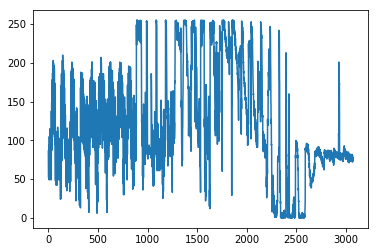

In [26]:
plt.plot(spatially_binned)
plt.show()

In [27]:
from skimage.feature import hog

In [28]:
hog?

In [29]:
# Define a function to return HOG features and visualization
def get_hog_features(img, orient=9, pix_per_cell=8, cell_per_block=2, vis=False, feature_vec=True):    
    features, hog_image = hog(
        img, 
        orientations=orient,
        pixels_per_cell=(pix_per_cell, pix_per_cell),
        cells_per_block=(cell_per_block, cell_per_block),
        block_norm='L2',
        visualise=True,
        feature_vector=True
    )
    if vis == True:
        # Use skimage.hog() to get both features and a visualization
        return({
            'features':features, 
            'image': hog_image
        })
    else:      
        # Use skimage.hog() to get features only
        return({
            'features':features
        })
    
orient = 9
pix_per_cell = 8
cell_per_block = 2
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [30]:
hog_obj = get_hog_features(gray, vis=True)

In [31]:
hog_obj

{'features': array([ 0.10610537,  0.03790032,  0.00960707, ...,  0.09153912,
         0.15463135,  0.27573912]),
 'image': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  3.41132811, ...,  0.28672485,
          0.        ,  0.        ],
        [ 0.        ,  2.66583157,  0.        , ...,  0.        ,
          0.06298639,  0.        ],
        ..., 
        [ 0.        ,  0.15031174,  0.        , ...,  0.        ,
          0.48629308,  0.        ],
        [ 0.        ,  0.        ,  0.1997788 , ...,  2.28630322,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]])}

In [45]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
import glob

# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

###### TODO ###########
# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256)):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for img in imgs:
        # Read in each one by one
        image = cv2.imread(img)
        
        # apply color conversion if other than 'RGB'
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        
        # Apply bin_spatial() to get spatial color features
        spatial_bin_features = bin_spatial(image)
        
        # Apply color_hist() to get color histogram features
        hist_features = color_hist(image)
        
        hog_features = get_hog_features(gray)['features']        
        # Append the new feature vector to the features list
        feature_vector = np.concatenate((spatially_binned, hist_features, hog_features))
        
        features.append(feature_vector)
        
    # Return list of feature vectors
    return features

images = glob.glob('../data/vehicle_detection/*.jpeg')
cars = []
notcars = []
for image in images:
    if 'image' in image or 'extra' in image:
        notcars.append(image)
    else:
        cars.append(image)
        
car_features = extract_features(cars, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))
notcar_features = extract_features(notcars, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))

In [44]:
if len(car_features) > 0:
    # Create an array

SyntaxError: unexpected EOF while parsing (<ipython-input-44-1263749124e1>, line 2)

In [46]:
# y stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)                        

# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)
car_ind = np.random.randint(0, len(cars))

In [47]:
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

In [48]:
from sklearn.cross_validation import train_test_split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
rand_state = np.random.randint(0, 100)

X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, 
    y, 
    test_size=0.2, 
    random_state=rand_state
)

In [51]:
from sklearn.svm import LinearSVC
# Use a linear SVC (support vector classifier)
svc = LinearSVC()
# Train the SVC
svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [52]:
print('Test Accuracy of SVC = ', svc.score(X_test, y_test))

Test Accuracy of SVC =  0.99375


In [53]:
X_test[0:10].reshape

<function ndarray.reshape>

In [54]:
print('My SVC predicts: ', svc.predict(X_test[0:10]))
print('For labels: ', y_test[0:10])

My SVC predicts:  [ 1.  0.  1.  0.  1.  1.  0.  1.  0.  1.]
For labels:  [ 1.  0.  1.  0.  1.  1.  0.  1.  0.  1.]
